In [ ]:
!kaggle datasets download -d inancigdem/eeg-data-for-mental-attention-state-detection
!unzip eeg-data-for-mental-attention-state-detection.zip
!pip install scipy==1.12.0

import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import os
from scipy import signal
import statistics
from scipy.fft import fft, fftshift
from tensorflow.keras import Sequential
import tensorflow as tf


Dataset URL: https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection
License(s): copyright-authors
 98% 548M/557M [00:04<00:00, 131MB/s]
100% 557M/557M [00:04<00:00, 117MB/s]
Archive:  eeg-data-for-mental-attention-state-detection.zip
  inflating: EEG Data/eeg_record1.mat  
  inflating: EEG Data/eeg_record10.mat  
  inflating: EEG Data/eeg_record11.mat  
  inflating: EEG Data/eeg_record12.mat  
  inflating: EEG Data/eeg_record13.mat  
  inflating: EEG Data/eeg_record14.mat  
  inflating: EEG Data/eeg_record15.mat  
  inflating: EEG Data/eeg_record16.mat  
  inflating: EEG Data/eeg_record17.mat  
  inflating: EEG Data/eeg_record18.mat  
  inflating: EEG Data/eeg_record19.mat  
  inflating: EEG Data/eeg_record2.mat  
  inflating: EEG Data/eeg_record20.mat  
  inflating: EEG Data/eeg_record21.mat  
  inflating: EEG Data/eeg_record22.mat  
  inflating: EEG Data/eeg_record23.mat  
  inflating: EEG Data/eeg_record24.mat  
  inflating: EEG Data/eeg_record25.ma

In [ ]:
file_names=[]
for dirname, _, filenames in os.walk('./EEG Data'):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))
file_names

['./EEG Data/eeg_record4.mat',
 './EEG Data/eeg_record8.mat',
 './EEG Data/eeg_record20.mat',
 './EEG Data/eeg_record25.mat',
 './EEG Data/eeg_record26.mat',
 './EEG Data/eeg_record30.mat',
 './EEG Data/eeg_record10.mat',
 './EEG Data/eeg_record21.mat',
 './EEG Data/eeg_record29.mat',
 './EEG Data/eeg_record3.mat',
 './EEG Data/eeg_record31.mat',
 './EEG Data/eeg_record6.mat',
 './EEG Data/eeg_record15.mat',
 './EEG Data/eeg_record33.mat',
 './EEG Data/eeg_record22.mat',
 './EEG Data/eeg_record14.mat',
 './EEG Data/eeg_record27.mat',
 './EEG Data/eeg_record16.mat',
 './EEG Data/eeg_record32.mat',
 './EEG Data/eeg_record24.mat',
 './EEG Data/eeg_record19.mat',
 './EEG Data/eeg_record12.mat',
 './EEG Data/eeg_record1.mat',
 './EEG Data/eeg_record9.mat',
 './EEG Data/eeg_record17.mat',
 './EEG Data/eeg_record18.mat',
 './EEG Data/eeg_record13.mat',
 './EEG Data/eeg_record7.mat',
 './EEG Data/eeg_record34.mat',
 './EEG Data/eeg_record28.mat',
 './EEG Data/eeg_record2.mat',
 './EEG Data/eeg

In [ ]:
from scipy.signal import butter, lfilter, freqz
from statistics import variance
from statistics import mean

def butter_highpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=4):
    b, a = butter_highpass(cutoff, fs, order=order)
    x = signal.filtfilt(b, a, data)
    y = signal.filtfilt(b, a, x)
    return y


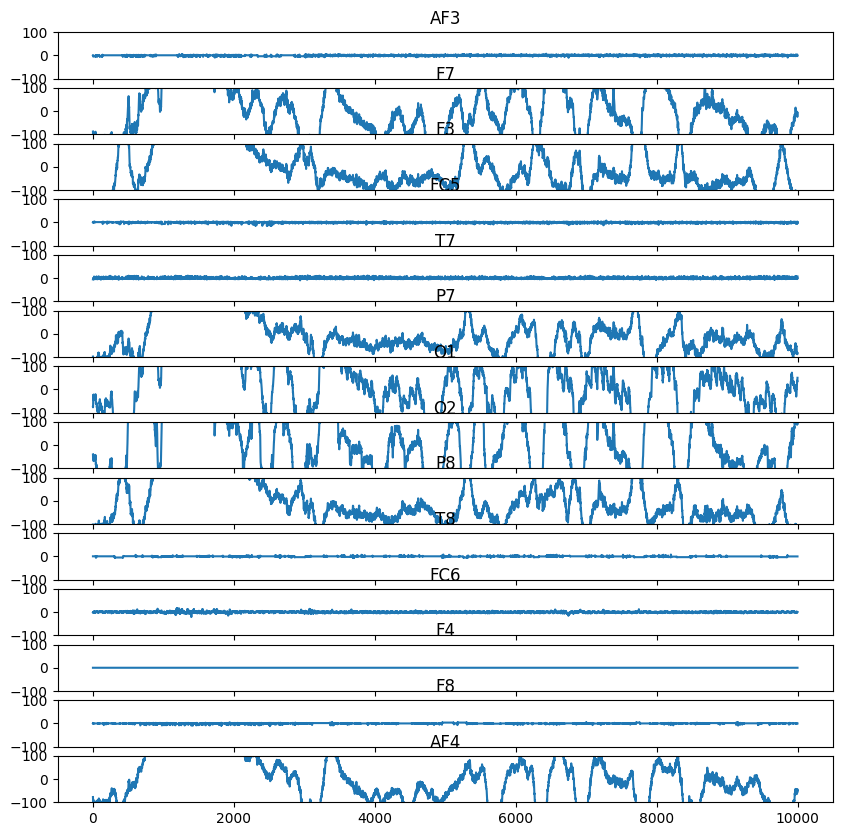

In [ ]:
fig, ax = plt.subplots(14,1)
fig.set_figwidth(20)
fig.set_figheight(40)
fig.set_size_inches(10,10)
mat = scipy.io.loadmat(file_names[0])
data = mat['o']['data'][0,0]
FS = mat['o']['sampFreq'][0][0][0][0]
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
for i in range(14):
    data_ave = data[5000:15000,i+3]-np.mean(data[5000:15000,i+3])
    ax[i].plot(data_ave)
    ax[i].set_title(channels[i])
    ax[i].set_ylim(-100,100)

In [ ]:
# fig, ax = plt.subplots(14,1)
# fig.set_figwidth(20)
# fig.set_figheight(50)
# fig.set_size_inches(10,10)
# mat = scipy.io.loadmat(file_names[6])
# data = mat['o']['data'][0,0]
# FS = mat['o']['sampFreq'][0][0][0][0]
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
channel_vars={}
for j in file_names:
  mat = scipy.io.loadmat(j)
  data = mat['o']['data'][0,0]
  FS = mat['o']['sampFreq'][0][0][0][0]
  for i in range(14):
      data_ave = data[5000:15000,i+3]-np.mean(data[5000:15000,i+3])
      if channels[i] not in channel_vars:
        channel_vars[channels[i]]=[variance(data_ave)]
      else:
        channel_vars[channels[i]].append(variance(data_ave))
     # print("channel:",channels[i]," variace",variance(data_ave))

channel_vars_avgs={}
for key,value in channel_vars.items():
  channel_vars_avgs[key]=mean(value)
channel_vars_avgs


{'AF3': 15.938941026407134,
 'F7': 5446.94882234157,
 'F3': 76572.73234921784,
 'FC5': 20.8748823001572,
 'T7': 12.142661104877547,
 'P7': 106470.03999346543,
 'O1': 34311.87911821798,
 'O2': 11848.965179589315,
 'P8': 11094.001025567695,
 'T8': 19.764553890048923,
 'FC6': 111.76262393397164,
 'F4': 7.710037052512019,
 'F8': 19.579533012898384,
 'AF4': 20233.657368410008}

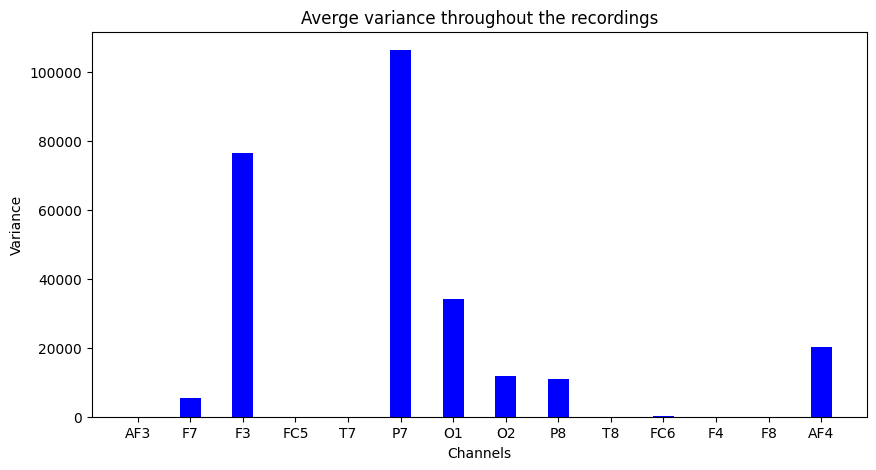

In [ ]:
channels = list(channel_vars_avgs.keys())
variance = list(channel_vars_avgs.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(channels, variance, color ='blue',
        width = 0.4)

plt.xlabel("Channels")
plt.ylabel("Variance")
plt.title("Averge variance throughout the recordings")
plt.show()


In [ ]:
k=['eeg_record25', 'eeg_record26', 'eeg_record17', 'eeg_record3', 'eeg_record20', 'eeg_record13', 'eeg_record14', 'eeg_record10', 'eeg_record21', 'eeg_record19', 'eeg_record4', 'eeg_record18', 'eeg_record33', 'eeg_record27', 'eeg_record32', 'eeg_record24', 'eeg_record11', 'eeg_record6', 'eeg_record31', 'eeg_record12', 'eeg_record7', 'eeg_record5', 'eeg_record34']

In [ ]:
useful_channels=[3,16]
useful_channels_names=['AF3','AF4']


In [ ]:
marker=128*60*10
useful_file_index = [3,4,5,6,7,10,11,12,13,14,17,18,19,20,21,24,25,26,27,31,32,33,34]
#useful_file_index = np.arange(1,35)
chan_num=7
trail_names=[]
data_focus={}
data_unfocus={}
data_drowsy={}
focus={}
unfocus={}
drowsy={}
#for i in useful_file_index:
i=1
for index,filename in enumerate(filenames):
    if int(filename.split('d')[1].split('.')[0]) in useful_file_index:
        mat = scipy.io.loadmat(file_names[index])
        trail_names.append(filename.split('.')[0])
        data_focus[trail_names[-1]]=mat['o']['data'][0,0][0:marker,useful_channels].copy()
        data_unfocus[trail_names[-1]]=mat['o']['data'][0,0][marker:2*marker,useful_channels].copy()
        data_drowsy[trail_names[-1]]=mat['o']['data'][0,0][2*marker:3*marker,useful_channels].copy()
        focus[trail_names[-1]]=mat['o']['data'][0,0][0:marker,useful_channels].copy()
        unfocus[trail_names[-1]]=mat['o']['data'][0,0][marker:2*marker,useful_channels].copy()
        drowsy[trail_names[-1]]=mat['o']['data'][0,0][2*marker:3*marker,useful_channels].copy()


In [ ]:
data_focus['eeg_record3']


array([[4440.51282051, 4024.1025641 ],
       [4440.51282051, 4017.94871795],
       [4440.51282051, 4018.97435897],
       ...,
       [4444.1025641 , 4151.28205128],
       [4444.1025641 , 4134.87179487],
       [4442.05128205, 4125.64102564]])

In [ ]:
# High Pass 0.16HZ
row, col = data_focus['eeg_record3'].shape
for name in trail_names:
    for i in range(col):
        data_focus[name][:,i]=butter_highpass_filter(data_focus[name][:,i], 0.16, 128, 4)
        data_unfocus[name][:,i]=butter_highpass_filter(data_unfocus[name][:,i], 0.16, 128, 4)
        data_drowsy[name][:,i]=butter_highpass_filter(data_drowsy[name][:,i], 0.16, 128, 4)
        print(name,data_drowsy[name][:,i].shape)


eeg_record4 (76800,)
eeg_record4 (76800,)
eeg_record20 (76800,)
eeg_record20 (76800,)
eeg_record25 (76800,)
eeg_record25 (76800,)
eeg_record26 (76800,)
eeg_record26 (76800,)
eeg_record10 (76800,)
eeg_record10 (76800,)
eeg_record21 (76800,)
eeg_record21 (76800,)
eeg_record3 (76800,)
eeg_record3 (76800,)
eeg_record31 (76800,)
eeg_record31 (76800,)
eeg_record6 (76800,)
eeg_record6 (76800,)
eeg_record33 (76800,)
eeg_record33 (76800,)
eeg_record14 (76800,)
eeg_record14 (76800,)
eeg_record27 (76800,)
eeg_record27 (76800,)
eeg_record32 (76800,)
eeg_record32 (76800,)
eeg_record24 (76800,)
eeg_record24 (76800,)
eeg_record19 (76800,)
eeg_record19 (76800,)
eeg_record12 (76800,)
eeg_record12 (76800,)
eeg_record17 (76800,)
eeg_record17 (76800,)
eeg_record18 (76800,)
eeg_record18 (76800,)
eeg_record13 (76800,)
eeg_record13 (76800,)
eeg_record7 (76800,)
eeg_record7 (76800,)
eeg_record34 (76800,)
eeg_record34 (76800,)
eeg_record5 (76800,)
eeg_record5 (76800,)
eeg_record11 (76800,)
eeg_record11 (76800,

In [ ]:
feature_names = []
freq_range=np.arange(0.5,18.5,0.5)
symb='_'
#useful_channels_names=['AF3','AF4']
for index,channel in enumerate(useful_channels_names):
    for freq in freq_range:
        feature_names.append(channel+symb+str(freq))
feature_names

row, col = data_focus['eeg_record3'].shape
for name in trail_names:
    for i in range(col):
        data_focus[name][:,i]=butter_highpass_filter(data_focus[name][:,i], 0.16, 128, 4)
        data_unfocus[name][:,i]=butter_highpass_filter(data_unfocus[name][:,i], 0.16, 128, 4)
        data_drowsy[name][:,i]=butter_highpass_filter(data_drowsy[name][:,i], 0.16, 128, 4)


In [ ]:
from scipy.signal.windows import blackman
# Number of sample points
N = 256
# sample spacing
T = 1.0 / 128.0

w = blackman(N)

#col is 2
power_focus = {}
for name in trail_names:
    power_focus[name]=np.zeros([col,36,300])

power_unfocus = {}
for name in trail_names:
    power_unfocus[name]=np.zeros([col,36,300])

power_drowsy = {}
for name in trail_names:
    power_drowsy[name]=np.zeros([col,36,300])

#the output of the stft is 513*601,1 second data will produce 1 column of data,there are 601
for name in trail_names:
    for i in range(col):
        for j in range(300):
            y1=fft(data_focus[name][:,i][j*256:(j+1)*256]*w)
            y2=fft(data_unfocus[name][:,i][j*256:(j+1)*256]*w)
            y3=fft(data_drowsy[name][:,i][j*256:(j+1)*256]*w)
            power_focus[name][i,:,j]=2.0/N * np.abs(y1[0:36])
            power_unfocus[name][i,:,j]=2.0/N * np.abs(y2[0:36])
            power_drowsy[name][i,:,j]=2.0/N * np.abs(y3[0:36])

# t_win = np.arange(0,128)
# M = 128
# window_blackman=0.42-0.5*np.cos((2*np.pi*t_win)/(M-1))+0.08*np.cos((4*np.pi*t_win)/(M-1))#window_blackman = signal.windows.blackmanharris(128)

# #col is 7
# power_focus = {}
# for name in trail_names:
#     power_focus[name]=np.zeros([col,513,601])

# power_unfocus = {}
# for name in trail_names:
#     power_unfocus[name]=np.zeros([col,513,601])

# power_drowsy = {}
# for name in trail_names:
#     power_drowsy[name]=np.zeros([col,513,601])

# #the output of the stft is 513*601,1 second data will produce 1 column of data,there are 601
# for name in trail_names:
#     for i in range(col):
#         f, t,y1=scipy.signal.stft(data_focus[name][:,i],fs=128, window=window_blackman, nperseg=128,
#                       noverlap=0, nfft=1024, detrend=False,return_onesided=True, boundary='zeros',
#                       padded=True)
#         f, t,y2=scipy.signal.stft(data_unfocus[name][:,i],fs=128, window=window_blackman, nperseg=128,
#                       noverlap=0, nfft=1024, detrend=False,return_onesided=True, boundary='zeros',
#                       padded=True)
#         f, t,y3=scipy.signal.stft(data_drowsy[name][:,i],fs=128, window=window_blackman, nperseg=128,
#                       noverlap=0, nfft=1024, detrend=False,return_onesided=True, boundary='zeros',
#                       padded=True)
#         power_focus[name][i,:,:]=(np.abs(y1))**2
#         power_unfocus[name][i,:,:]=(np.abs(y2))**2
#         power_drowsy[name][i,:,:]=(np.abs(y3))**2


# t_win = np.arange(0,128)
# M = 128
# window_blackman=0.42-0.5*np.cos((2*np.pi*t_win)/(M-1))+0.08*np.cos((4*np.pi*t_win)/(M-1))










In [ ]:
print(power_focus['eeg_record3'][0,:,:])


[[0.68191045 1.10945647 0.22305876 ... 0.13903361 0.11001418 0.67892318]
 [0.34956585 1.40760571 0.36780437 ... 0.10178064 0.180588   0.63212785]
 [0.28626486 1.62775354 0.40575058 ... 0.07568639 0.19585076 0.43403479]
 ...
 [0.55181345 0.22630055 0.16221915 ... 0.04568727 0.06431531 0.17935618]
 [0.61046572 0.24464614 0.09830925 ... 0.06184853 0.13164308 0.19465136]
 [0.70703005 0.12039948 0.03904228 ... 0.08754563 0.12331308 0.1606968 ]]


In [ ]:
# num=[]

# power_focus_bin = {}
# for name in trail_names:
#     power_focus_bin[name]=np.zeros([7,36,601])

# power_unfocus_bin = {}
# for name in trail_names:
#     power_unfocus_bin[name]=np.zeros([7,36,601])

# power_drowsy_bin = {}
# for name in trail_names:
#     power_drowsy_bin[name]=np.zeros([7,36,601])

# for name in trail_names:
#     for chn in range(col):
#         j=0
#         for i in range(1,144,4):
#             power_focus_bin[name][chn,j,:]=np.average(power_focus[name][chn,i:i+4,:],axis=0)
#             power_unfocus_bin[name][chn,j,:]=np.average(power_unfocus[name][chn,i:i+4,:],axis=0)
#             power_drowsy_bin[name][chn,j,:]=np.average(power_drowsy[name][chn,i:i+4,:],axis=0)
#             #print(np.average(power_drowsy[name][chn,i:i+4,:],axis=0).shape)
#             #if name=='eeg_record3':
#             #    if chn==0:
#             #        num.append((f[i:i+4]))
#             #    print(j)
#             j=j+1

# #print(num)
# #print(len(num))

num=[]

power_focus_bin = {}
for name in trail_names:
    power_focus_bin[name]=np.zeros([2,36,300])

power_unfocus_bin = {}
for name in trail_names:
    power_unfocus_bin[name]=np.zeros([2,36,300])

power_drowsy_bin = {}
for name in trail_names:
    power_drowsy_bin[name]=np.zeros([2,36,300])

for name in trail_names:
    for chn in range(col):
        j=0
        for i in range(1,144,4):
            power_focus_bin[name][chn,j,:]=np.average(power_focus[name][chn,i:i+4,:],axis=0)
            power_unfocus_bin[name][chn,j,:]=np.average(power_unfocus[name][chn,i:i+4,:],axis=0)
            power_drowsy_bin[name][chn,j,:]=np.average(power_drowsy[name][chn,i:i+4,:],axis=0)
            #print(np.average(power_drowsy[name][chn,i:i+4,:],axis=0).shape)
            #if name=='eeg_record3':
            #    if chn==0:
            #        num.append((f[i:i+4]))
            #    print(j)
            j=j+1



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
# # avarage over 15 seconds running window.


power_focus_ave = {}
for name in trail_names:
    power_focus_ave[name]=np.zeros([2,36,292])

power_unfocus_ave = {}
for name in trail_names:
    power_unfocus_ave[name]=np.zeros([2,36,292])

power_drowsy_ave = {}
for name in trail_names:
    power_drowsy_ave[name]=np.zeros([2,36,292])

for name in trail_names:
    for chn in range(col):
        j=0
        for k in range(0,292):
            power_focus_ave[name][chn,:,j]=np.average(power_focus[name][chn,:,k:k+8],axis=1)
            power_unfocus_ave[name][chn,:,j]=np.average(power_unfocus[name][chn,:,k:k+8],axis=1)
            power_drowsy_ave[name][chn,:,j]=np.average(power_drowsy[name][chn,:,k:k+8],axis=1)
            #print(np.average(power_drowsy_bin[name][chn,:,k:k+15],axis=1).shape)
            j=j+1


In [ ]:
svm_focus = {}
for name in trail_names:
    svm_focus[name]=np.zeros([72,300])

svm_unfocus = {}
for name in trail_names:
    svm_unfocus[name]=np.zeros([72,300])

svm_drowsy = {}
for name in trail_names:
    svm_drowsy[name]=np.zeros([72,300])

for name in trail_names:
    for j in range(300):
        svm_focus[name][:,j]=power_focus[name][:,:,j].reshape(1,-1)
        svm_unfocus[name][:,j]=power_unfocus[name][:,:,j].reshape(1,-1)
        svm_drowsy[name][:,j]=power_drowsy[name][:,:,j].reshape(1,-1)
    svm_focus[name]=10*np.log(svm_focus[name])
    svm_unfocus[name]=10*np.log(svm_unfocus[name])
    svm_drowsy[name]=10*np.log(svm_drowsy[name])


In [ ]:
#--------0
label_focus = [0]*300
#--------1
label_unfocus = [1]*300
#--------2
label_drowsy = [2]*300

#subject is the variable for all participants

subj1_files={'eeg_record3','eeg_record4','eeg_record5','eeg_record6','eeg_record7'}
subj2_files={'eeg_record10','eeg_record11','eeg_record12','eeg_record13','eeg_record14'}
subj3_files={'eeg_record17','eeg_record18','eeg_record19','eeg_record20','eeg_record21'}
subj4_files={'eeg_record24','eeg_record25','eeg_record26','eeg_record27'}
subj5_files={'eeg_record31','eeg_record32','eeg_record33','eeg_record34'}

In [ ]:
target=[]
subj=np.array([]).reshape(72,0).copy()
for name in trail_names:
    subj=np.concatenate((subj,svm_focus[name]), axis=1)
    subj=np.concatenate((subj,svm_unfocus[name]), axis=1)
    subj=np.concatenate((subj,svm_drowsy[name]), axis=1)
    target = target+label_focus+label_unfocus+label_drowsy
subj=subj.T
target = np.array(target)


In [ ]:
subj.shape


(20700, 72)

In [ ]:
target1=[]
subj1=np.array([]).reshape(72,0).copy()
for name in subj1_files:
    subj1=np.concatenate((subj1,svm_focus[name]), axis=1)
    subj1=np.concatenate((subj1,svm_unfocus[name]), axis=1)
    subj1=np.concatenate((subj1,svm_drowsy[name]), axis=1)
    target1 = target1+label_focus+label_unfocus+label_drowsy
subj1=subj1.T
target1 = np.array(target1)


In [ ]:
print(subj1.shape)
print(len(target1))


(4500, 72)
4500


In [ ]:
target2=[]
subj2=np.array([]).reshape(72,0).copy()
for name in subj2_files:
    subj2=np.concatenate((subj2,svm_focus[name]), axis=1)
    subj2=np.concatenate((subj2,svm_unfocus[name]), axis=1)
    subj2=np.concatenate((subj2,svm_drowsy[name]), axis=1)
    target2 = target2+label_focus+label_unfocus+label_drowsy
subj2=subj2.T
target2 = np.array(target2)


In [ ]:
target3=[]
subj3=np.array([]).reshape(72,0).copy()
for name in subj3_files:
    subj3=np.concatenate((subj3,svm_focus[name]), axis=1)
    subj3=np.concatenate((subj3,svm_unfocus[name]), axis=1)
    subj3=np.concatenate((subj3,svm_drowsy[name]), axis=1)
    target3 = target3+label_focus+label_unfocus+label_drowsy
subj3=subj3.T
target3 = np.array(target3)


In [ ]:
target4=[]
subj4=np.array([]).reshape(72,0).copy()
for name in subj4_files:
    subj4=np.concatenate((subj4,svm_focus[name]), axis=1)
    subj4=np.concatenate((subj4,svm_unfocus[name]), axis=1)
    subj4=np.concatenate((subj4,svm_drowsy[name]), axis=1)
    target4 = target4+label_focus+label_unfocus+label_drowsy
subj4=subj4.T
target4 = np.array(target4)


In [ ]:
target5=[]
subj5=np.array([]).reshape(72,0).copy()
for name in subj5_files:
    subj5=np.concatenate((subj5,svm_focus[name]), axis=1)
    subj5=np.concatenate((subj5,svm_unfocus[name]), axis=1)
    subj5=np.concatenate((subj5,svm_drowsy[name]), axis=1)
    target5 = target5+label_focus+label_unfocus+label_drowsy
subj5=subj5.T
target5 = np.array(target5)


In [ ]:
n_past=8
subj_new=[]
for i in range(n_past ,len(subj)):
    subj_new.append(subj[i-n_past:i,0:72])
subj_new=np.array(subj_new)


In [ ]:
target_new=target[n_past:]


In [ ]:
# Train the data from subj
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC

arr = np.arange(20692)
np.random.shuffle(arr)
data_train, data_test,data_train_target, data_test_target = subj_new[arr[:20000]],subj_new[arr[20000:]],target_new[arr[:20000]],target_new[arr[20000:]]
nsamples, nx, ny = data_train.shape
d2_train_dataset = data_train.reshape((nsamples,nx*ny))

scaler = preprocessing.StandardScaler().fit(d2_train_dataset)
X_train_scaled = scaler.transform(d2_train_dataset)
X_test_scaled = scaler.transform(d2_train_dataset)


In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled,data_train_target)
print(f'The Score for Training data with SVM Model for subject1:',svm.score(X_train_scaled,data_train_target))


The Score for Training data with SVM Model for subject1: 0.8572


In [ ]:
nn=Sequential([
    tf.keras.layers.Dense(70,activation='relu'),
    tf.keras.layers.Dense(45,activation='relu'),
    tf.keras.layers.Dense(21,activation='relu'),
    tf.keras.layers.Dense(3,activation='sigmoid')
])
nn.compile(loss=tf.keras.losses.BinaryCrossentropy())
nn.fit(X_train_scaled,data_train_target1,epochs=30)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5762
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4694
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4168
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3707
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3287
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2872
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2503
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2133
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1779
Epoch 10/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1480
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1251
Epoch 12/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1030
Epoch 13/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0926
Epoch 14/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0794
Epoch 15/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
pred=nn.predict(data_test)
pre=np.argmax(pred,axis=1)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
pred=nn.predict(data_test)
pre=np.argmax(pred,axis=1)
np.sum(pre==data_test_target)/len(pre)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.9465317919075145

In [ ]:
from sklearn.preprocessing import OneHotEncoder
en=OneHotEncoder()
data_train_target1=en.fit_transform(data_train_target.reshape(-1,1))
data_test_target1=en.fit_transform(data_test_target.reshape(-1,1))



In [ ]:
data_train_target1 = data_train_target1.toarray()
data_test_target1 = data_test_target1.toarray()


In [ ]:
data_train_target.shape


(20000,)

In [ ]:
data_train.shape


(20000, 8, 72)

In [ ]:
nn=Sequential([
    tf.keras.layers.LSTM(45,return_sequences=True, input_shape= (8,72)),
    tf.keras.layers.LSTM(27,return_sequences=False,activation='relu'),
    tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(3,activation='sigmoid')
])
nn.compile(loss=tf.keras.losses.BinaryCrossentropy())
nn.fit(data_train,data_train_target1,epochs=30)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5886
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5169
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4671
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4267
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3847
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3491
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3162
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2854
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2583
Epoch 10/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2352
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2176
Epoch 12/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1945
Epoch 13/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1766
Epoch 14/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1649
Epoch 15/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - lo

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
tf.random.set_seed(0)
kfold = KFold(n_splits=5, shuffle=True)

data_train_target=data_train_target1

fold_no = 1

score_tr=[]
score_cv=[]

svm = SVC(kernel='rbf')

for train,cv in kfold.split(data_train,data_train_target):
    X_tr = data_train[train]
    Y_tr = data_train_target[train]
    X_cv = data_train[cv]
    Y_cv = data_train_target[cv]

    tf.random.set_seed(0)

    svm.fit(X_tr,Y_tr)
    score_tr.append(svm.score(X_tr,Y_tr))
    score_cv.append(svm.score(X_cv,Y_cv))

    print(f'Score for {fold_no} Fold Training: {score_tr[-1]:.3f}')
    print(f'Score for {fold_no} Fold cv    : {score_cv[-1]:.3f}')
    print('----------------------------------')
    fold_no = fold_no + 1

print(f'Score of Average For Training: {np.mean(score_tr):.3f}')
print(f'Score of Average For CV.     : {np.mean(score_cv):.3f}')

ValueError: Found array with dim 3. SVC expected <= 2.